Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information
Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### we can see we have null values in age column and cabin, and embark column

In [36]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [37]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [39]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## removed all nulls 

In [41]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000     

In [42]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## lets check feature relation with target variable

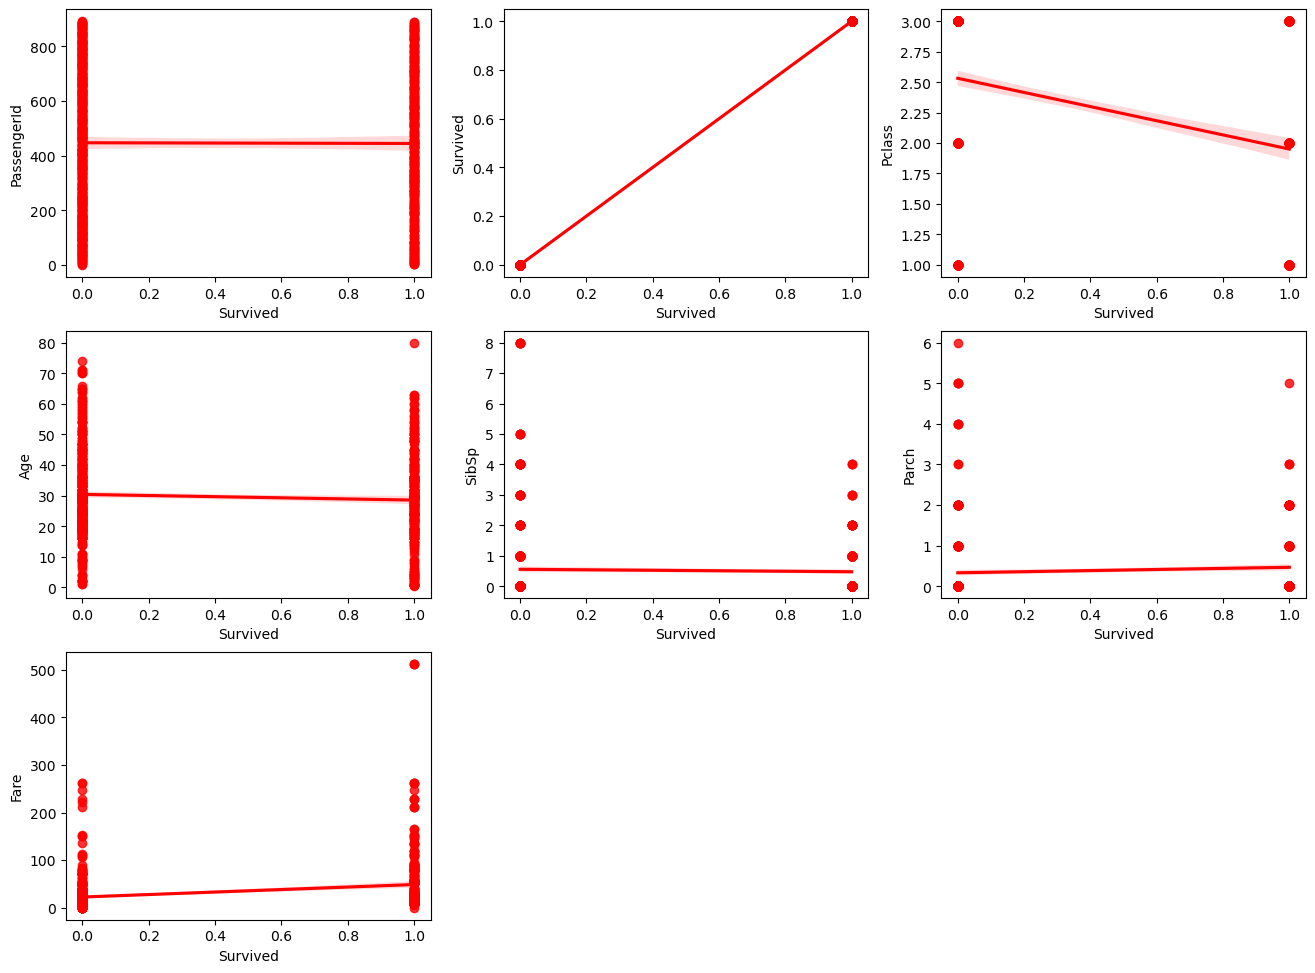

In [43]:
df1 = df.select_dtypes(include='number')
plt.figure(figsize=(16,16))
p=1
for i in df1:
    if p<=11:
        plt.subplot(4,3,p)
        sns.regplot(x='Survived',y=i,data=df1,color='r')
        #sns.lmplot(data=df1,x='Happiness Score',y=i,palette='colorblind')
        plt.xlabel("Survived")
        plt.ylabel(i)
    p+=1
plt.show()

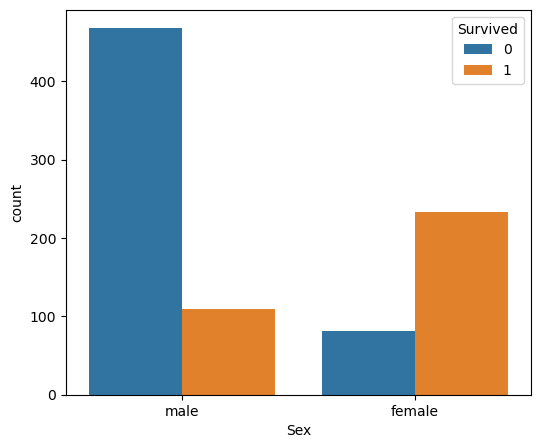

In [48]:
plt.figure(figsize=(6,5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

In [49]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


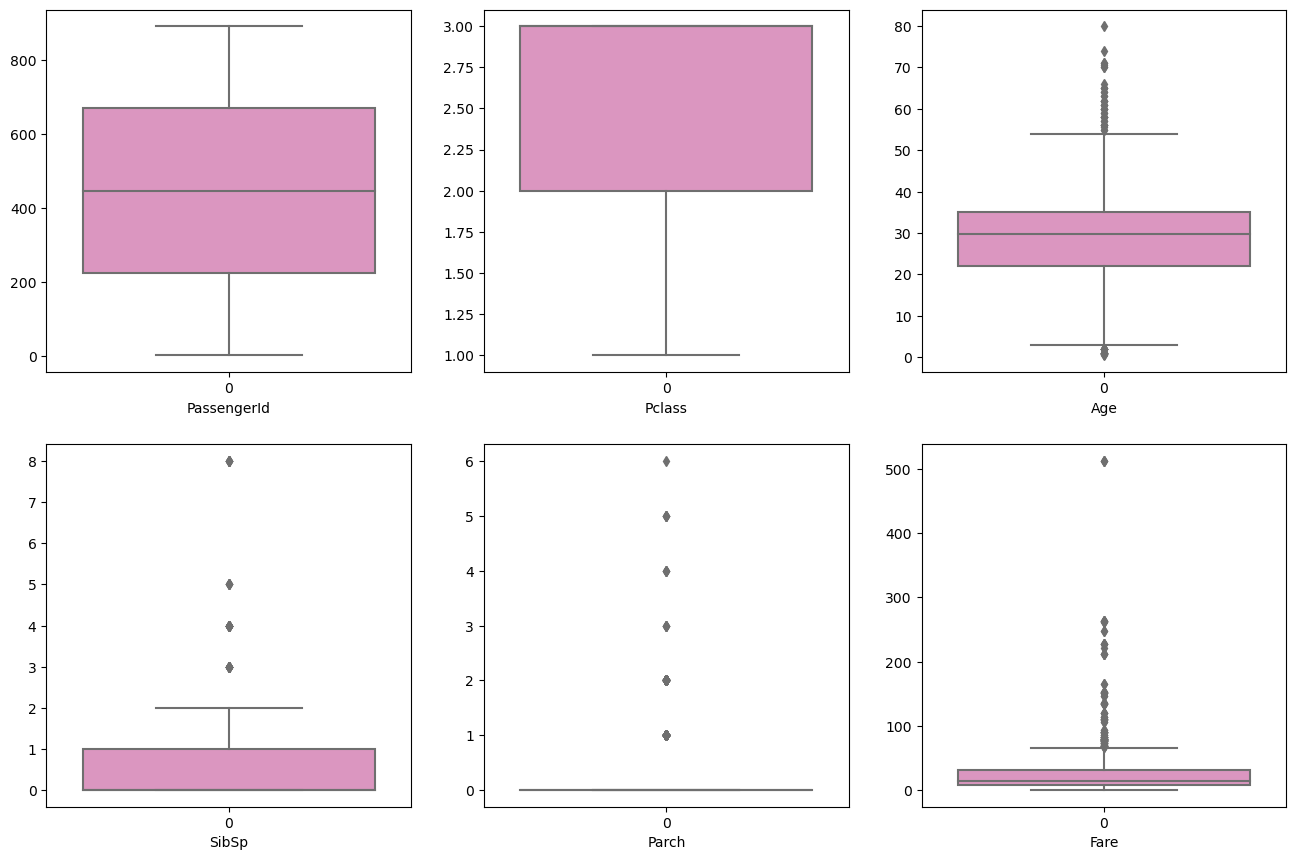

In [51]:
features = df.select_dtypes(include='number').drop(columns=['Survived'])
plt.figure(figsize=(16,16))
n=1
for i in features:
    if n<=12:
        plt.subplot(3,3,n)
        sns.boxplot(features[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

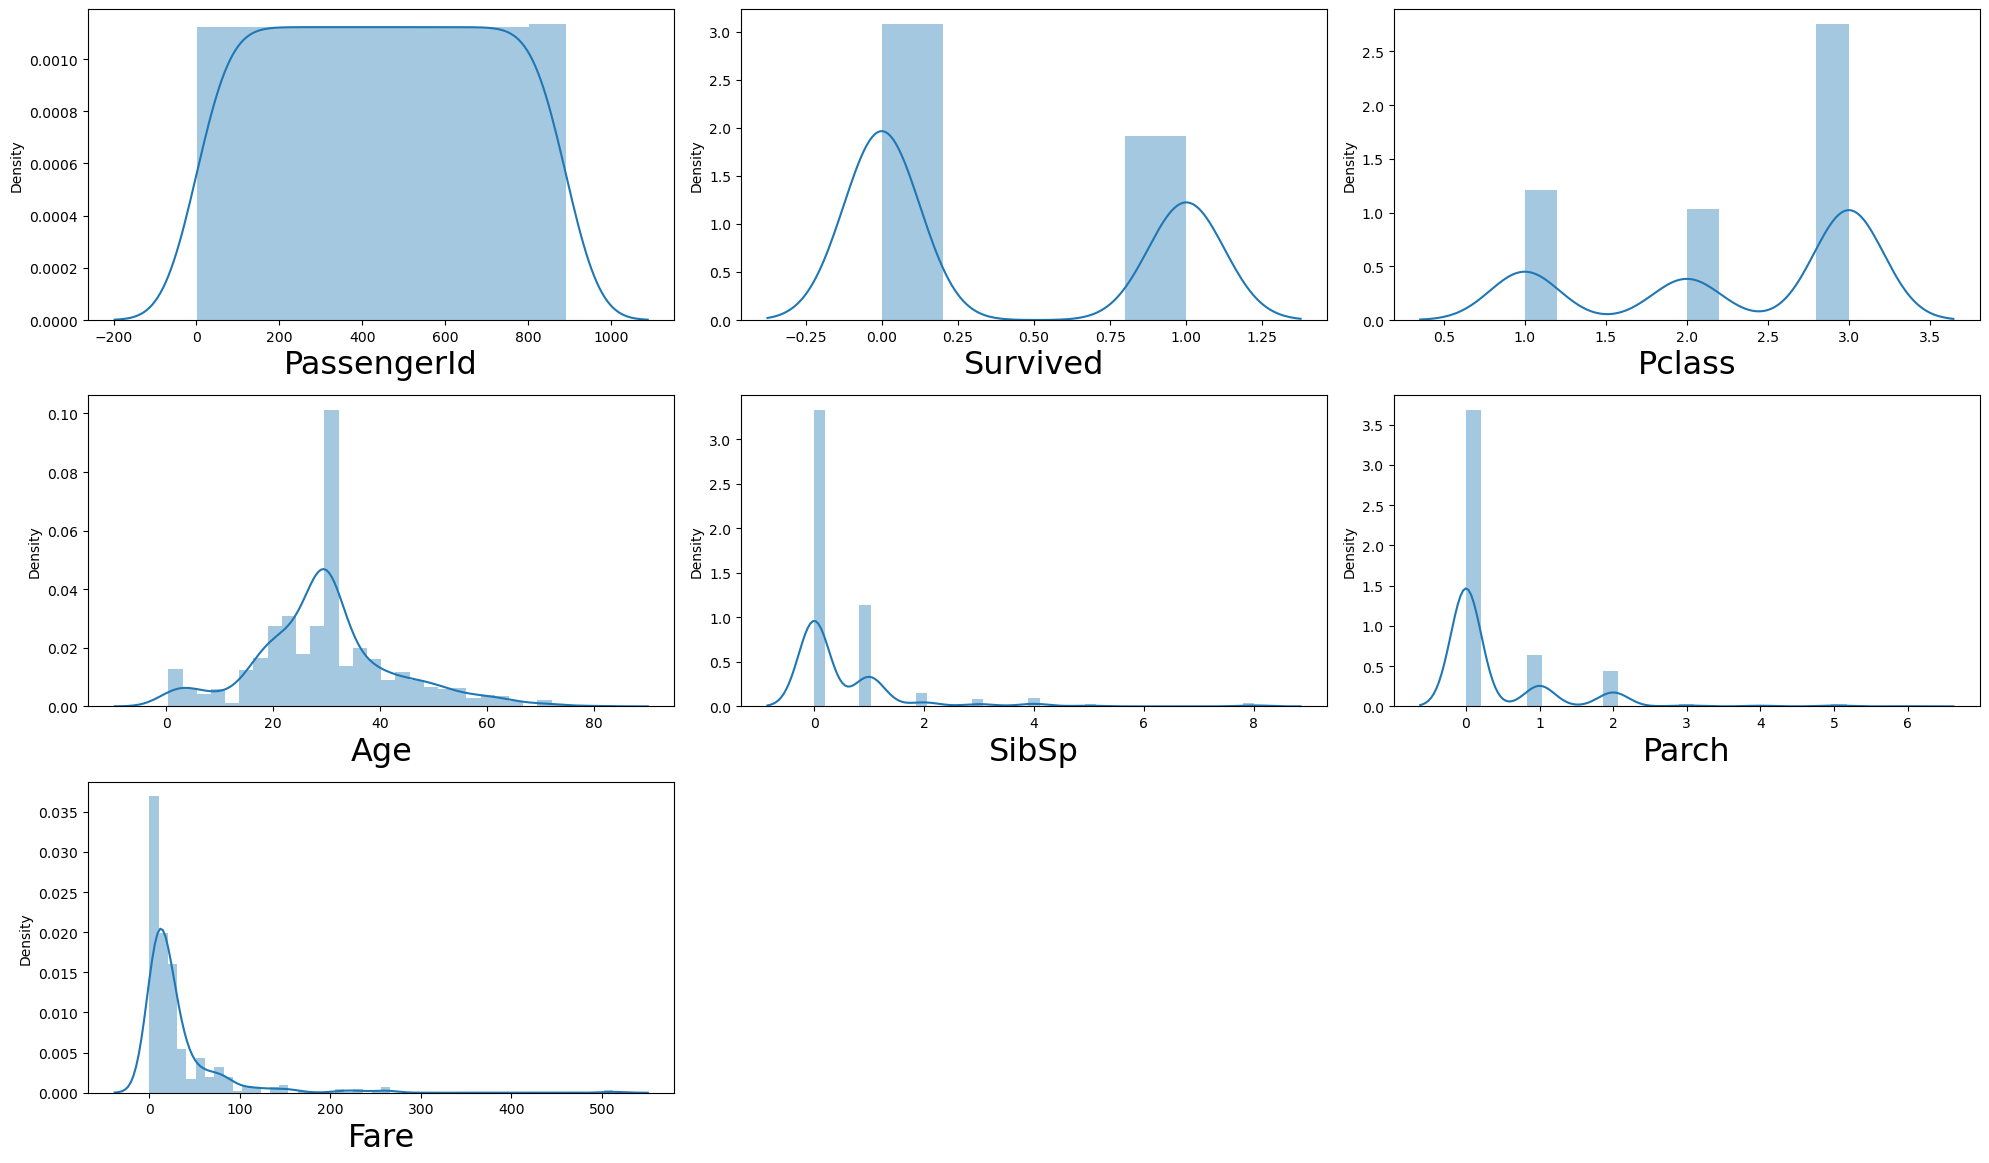

In [52]:
df1 = df.select_dtypes(include='number')
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=23)
    plotnumber+=1
plt.tight_layout()

In [53]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

we can see there is skewness in Sibsp parch and fare column

In [66]:
df['SibSp'] = np.cbrt(df['SibSp'])

In [67]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          1.033059
Parch          2.749117
Fare           4.787317
dtype: float64

In [68]:
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])

In [69]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          1.033059
Parch          1.348334
Fare           1.230382
dtype: float64

In [70]:
x = df.drop('Survived',axis=1)
y = df['Survived']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (891, 11)
label Dimension (891,)


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.select_dtypes(include='number').drop(columns=['Survived'])
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.730108,0.827377,-0.592481,1.187523,-0.551654,-0.774708
1,-1.726220,-1.566107,0.638789,1.187523,-0.551654,1.287903
2,-1.722332,0.827377,-0.284663,-0.660582,-0.551654,-0.720325
3,-1.718444,-1.566107,0.407926,1.187523,-0.551654,0.926230
4,-1.714556,0.827377,0.407926,-0.660582,-0.551654,-0.710596
...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.207709,-0.660582,-0.551654,-0.386703
887,1.718444,-1.566107,-0.823344,-0.660582,-0.551654,0.318502
888,1.722332,0.827377,0.000000,1.187523,1.999751,0.089990
889,1.726220,-1.566107,-0.284663,-0.660582,-0.551654,0.318502


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS =0
for i in range(1,111):
    x_train, x_test, y_train, y_test = train_test_split(features,y, test_size=0.3, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)# training model
    pred = RFR.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i# setting best random state for higher accuracy
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.7723880597014925 at random_state 91


from above code we can say i am getting best accuracy at random state 91

In [81]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
# creating one function for various classification model
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)
    model.fit(x_train,y_train)# Training the model
    pred = model.predict(x_test)# predicting y test
    acc = accuracy_score(y_test,pred)# give accuracy score
    print("accuracy score",acc)
    print("classification_report",classification_report(y_test,pred))
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [82]:

model=LogisticRegression()
classify(model,x,y)

accuracy score 0.6871508379888268
classification_report               precision    recall  f1-score   support

           0       0.67      0.88      0.76       101
           1       0.74      0.44      0.55        78

    accuracy                           0.69       179
   macro avg       0.70      0.66      0.65       179
weighted avg       0.70      0.69      0.67       179

Cross Validation Score: 0.6981859268093654

Accuracy Score - Cross Validation Score is -0.011035088820538608


In [83]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=37)
classify(model, x, y)

accuracy score 0.6815642458100558
classification_report               precision    recall  f1-score   support

           0       0.66      0.88      0.76       101
           1       0.73      0.42      0.54        78

    accuracy                           0.68       179
   macro avg       0.70      0.65      0.65       179
weighted avg       0.69      0.68      0.66       179

Cross Validation Score: 0.7161320695499341

Accuracy Score - Cross Validation Score is -0.03456782373987832


In [84]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

accuracy score 0.659217877094972
classification_report               precision    recall  f1-score   support

           0       0.68      0.75      0.71       101
           1       0.63      0.54      0.58        78

    accuracy                           0.66       179
   macro avg       0.65      0.65      0.65       179
weighted avg       0.66      0.66      0.66       179

Cross Validation Score: 0.6790596949344047

Accuracy Score - Cross Validation Score is -0.01984181783943262


In [85]:
#GradientBoostingClassifier
model=GradientBoostingClassifier()
classify(model,x,y)

accuracy score 0.659217877094972
classification_report               precision    recall  f1-score   support

           0       0.66      0.81      0.73       101
           1       0.65      0.46      0.54        78

    accuracy                           0.66       179
   macro avg       0.66      0.64      0.64       179
weighted avg       0.66      0.66      0.65       179

Cross Validation Score: 0.6689787207331618

Accuracy Score - Cross Validation Score is -0.009760843638189742


In [126]:
model=BaggingClassifier()
classify(model,x,y)

accuracy score 0.7039106145251397
classification_report               precision    recall  f1-score   support

           0       0.70      0.83      0.76       101
           1       0.71      0.54      0.61        78

    accuracy                           0.70       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.70      0.70       179

Cross Validation Score: 0.6790659720042684

Accuracy Score - Cross Validation Score is 0.024844642520871263


In [87]:
#AdaBoostClassifier
model=AdaBoostClassifier()
classify(model,x,y)

accuracy score 0.659217877094972
classification_report               precision    recall  f1-score   support

           0       0.66      0.83      0.73       101
           1       0.67      0.44      0.53        78

    accuracy                           0.66       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.66      0.66      0.64       179

Cross Validation Score: 0.668972443663298

Accuracy Score - Cross Validation Score is -0.009754566568325962


In [88]:
model=RandomForestClassifier(max_depth=15, random_state=37)
classify(model,x,y)

accuracy score 0.6871508379888268
classification_report               precision    recall  f1-score   support

           0       0.69      0.80      0.74       101
           1       0.68      0.54      0.60        78

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.69      0.69      0.68       179

Cross Validation Score: 0.6902705417111292

Accuracy Score - Cross Validation Score is -0.0031197037223024138


after comparing all classifier i am choosing BaggingClassifier because has least differenceAccuracy Score and Cross Validation Score


In [99]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = {'n_estimators':[1, 2, 3, 4, 5],'max_samples': [2.5, 0.1, 0.2, 0.3,4.0],'max_features':[1.0,2.0,3.0,4.0,5.0],'bootstrap':[True,False]}
gscv = GridSearchCV(BaggingClassifier(),parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1.0, 2.0, 3.0, 4.0, 5.0],
                         'max_samples': [2.5, 0.1, 0.2, 0.3, 4.0],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [124]:
gscv.best_params_

{'bootstrap': False,
 'max_features': 1.0,
 'max_samples': 0.2,
 'n_estimators': 4}

In [125]:
Final_Model =BaggingClassifier(max_samples=0.2,n_estimators=4,max_features=1.0,bootstrap=False)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 64.92537313432835
